# Juntando R y Python

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri

In [72]:
rpy2.robjects.numpy2ri.activate()

In [73]:
codigo_r = """
saludar <- function(cadena){
    return(paste("Hola, ", cadena))
}
"""

In [74]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x11322d7c8 / R:0x7f9101b37e60>

In [75]:
saludar_py = ro.globalenv["saludar"]

In [76]:
res = saludar_py("Antonio Banderas")
res[0]

'Hola,  Antonio Banderas'

In [77]:
type(res)

rpy2.robjects.vectors.StrVector

In [78]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [79]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [80]:
var_from_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


In [81]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [15]:
ro.globalenv["var_to_r"] = var_from_python

In [16]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [17]:
ro.r("sum(var_to_r)")

array([118.])

In [18]:
ro.r("mean(var_to_r)")

array([2.95])

In [19]:
ro.r("sd(var_to_r)")

array([1.16904519])

In [20]:
np.sum(var_from_python)

118.00000000000007

In [21]:
np.mean(var_from_python)

2.950000000000002

In [22]:
ro.r("summary(var_to_r)")

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [23]:
ro.r("hist(var_to_r, breaks = 4)")

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x115283888 / R:0x7fc8dc7de940>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x118818348 / R:0x7fc8dc7dece8>
[1.000000, 2.000000, 3.000000, 4.000000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x118816148 / R:0x7fc8def2e470>
[11, 10, 10, 9]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x118820288 / R:0x7fc8dc7df2d8>
[0.275000, 0.250000, 0.250000, 0.225000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x118820c88 / R:0x7fc8dc7df128>
[1.500000, 2.500000, 3.500000, 4.500000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x1188201c8 / R:0x7fc8dc7d7478>
['var_to_r']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x118820b48 / R:0x7fc8de98f358>
[       1]

# Trabajar de forma conjunta entre R y Python

In [1]:
from rpy2.robjects.packages import importr

In [ ]:
ro.r("install.packages('extRemes')")# si os falla decidle 'n' al hacer la instalación

In [17]:
extremes = importr("extRemes") # library(extRemes)

In [18]:
fevd = extremes.fevd

In [19]:
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x10ff108b8 / R:0x7f90fdf77678>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data to which the

In [25]:
data = pd.read_csv("../datasets/time/time_series.txt", 
                   sep = "\s*", skiprows = 1, parse_dates = [[0,1]],
                   names = ["date", "time", "wind_speed"],
                   index_col = 0)

/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [26]:
data.head(5)

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [23]:
data.shape

(275352, 1)

In [36]:
max_ws = data.wind_speed.groupby(pd.TimeGrouper(freq="A")).max()

/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [37]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

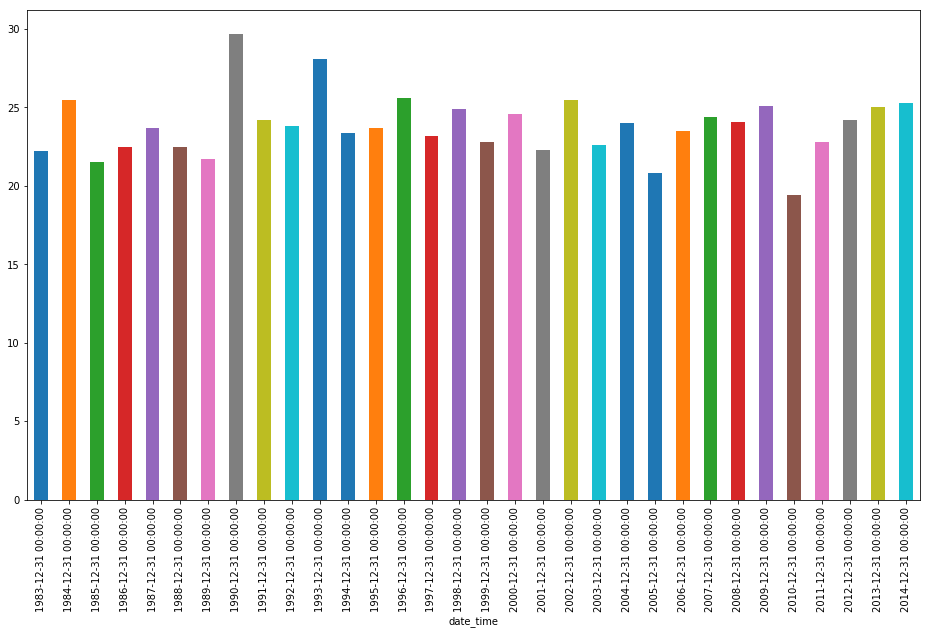

In [38]:
max_ws.plot(kind="bar", figsize=(16,9))

In [39]:
result = fevd(max_ws.values, type="GEV", method = "GMLE")

In [40]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [41]:
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x115c53308 / R:0x7f90fe4f48d0>
[Vector, StrVector, FloatVector, BoolVector, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x11141ab88 / R:0x7f90fdf4bce8>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x11141a7c8 / R:0x7f910162d340>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x11141af48 / R:0x7f910260beb8>
[1.000000]
  in.data: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x11141af08 / R:0x7f9102164fb8>
[       0]
...
  priorFun: <class 'rpy2.robject

In [43]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "in.data"        
 [5] "x"               "priorFun"        "priorParams"     "method"         
 [9] "type"            "period.basis"    "par.models"      "const.loc"      
[13] "const.scale"     "const.shape"     "n"               "na.action"      
[17] "parnames"        "results"         "initial.results"



In [44]:
res = result.rx("results")

In [58]:
print(res[0])

$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





In [62]:
loc, scale, shape = res[0].rx("par")[0]

In [63]:
loc

23.06394151991562

In [64]:
scale

1.7576912874286912

In [65]:
shape

-0.1628816367715244

# Función mágica para R

In [66]:
%load_ext rpy2.ipython

/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/rpy2/ipython/rmagic.py:73: UserWarning: The Python package 'pandas' is stronglyrecommended when using `rpy2.ipython`. Unfortunately it could not be loaded, but at least we found 'numpy'.
  "but at least we found 'numpy'.")))


In [67]:
help(rpy2.ipython.rmagic.RMagics.R)

Help on function R in module rpy2.ipython.rmagic:

R(self, line, cell=None, local_ns=None)
    ::
    
      %R [-i INPUT] [-o OUTPUT] [-n] [-w WIDTH] [-h HEIGHT] [-p POINTSIZE]
             [-b BG] [--noisolation] [-u {px,in,cm,mm}] [-r RES] [-c CONVERTER]
             [code [code ...]]
    
    Execute code in R, optionally returning results to the Python runtime.
    
    In line mode, this will evaluate an expression and convert the returned
    value to a Python object.  The return value is determined by rpy2's
    behaviour of returning the result of evaluating the final expression.
    
    Multiple R expressions can be executed by joining them with semicolons::
    
        In [9]: %R X=c(1,4,5,7); sd(X); mean(X)
        Out[9]: array([ 4.25])
    
    In cell mode, this will run a block of R code. The resulting value
    is printed if it would be printed when evaluating the same code
    within a standard R REPL.
    
    Nothing is returned to python by default in cell mode::

In [68]:
%R X=c(1,4,5,7); sd(X); mean(X)

array([4.25])

In [69]:
%%R
Y = c(2,4,3,9)
lm = lm(Y~X)
summary(lm)


Call:
lm(formula = Y ~ X)

Residuals:
    1     2     3     4 
 0.88 -0.24 -2.28  1.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.0800     2.3000   0.035    0.975
X             1.0400     0.4822   2.157    0.164

Residual standard error: 2.088 on 2 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.549 
F-statistic: 4.651 on 1 and 2 DF,  p-value: 0.1638



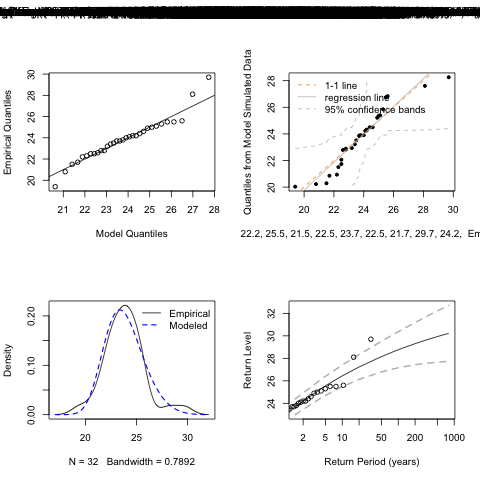

In [70]:
%R -i result plot.fevd(result)

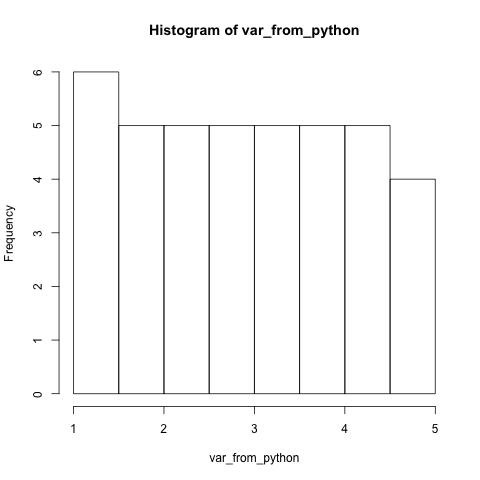

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x116034d08 / R:0x7f9102174c80>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x116034c88 / R:0x7f9101193350>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x113253d48 / R:0x7f9101e2f120>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x11324d288 / R:0x7f9101b6f818>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x113250688 / R:0x7f910161a3a8>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x115408388 / R:0x7f90fefdce78>
['var_from_python']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x11554e948 / R:0x7f90fe9a8558>
[       1]

In [82]:
%R -i var_from_python hist(var_from_python)

In [84]:
ro.globalenv["result"] = result
ro.r("plot.fevd(result)") ## puede dar error y generar un objeto rpy2.rinterface.NULL

rpy2.rinterface.NULL

# Un ejemplo complejo de R, Python y Rmagic

In [90]:
metodos = ["MLE", "GMLE", "Bayesian", "Lmoments"]
tipos = ["GEV", "Gumbel"]

Tipo de Ajuste:  GEV
Método del Ajuste:  MLE
$par
  location      scale      shape 
23.0517078  1.8085853 -0.1497984 

$value
[1] 66.22729

$counts
function gradient 
      27        6 

$convergence
[1] 0

$message
NULL

$hessian
           location      scale     shape
location  9.1825628 -0.3982934  11.22038
scale    -0.3982934 21.4422632  19.81854
shape    11.2203805 19.8185358 172.17411

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





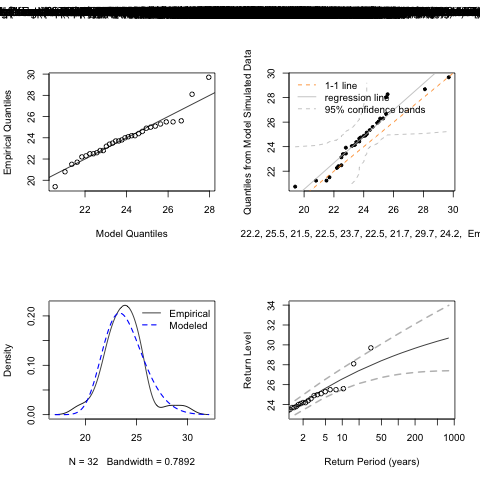

Tipo de Ajuste:  GEV
Método del Ajuste:  GMLE
$par
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 

$value
[1] 1e+16

$counts
function gradient 
       1        1 

$convergence
[1] 0

$message
NULL

$hessian
         location scale shape
location        0     0     0
scale           0     0     0
shape           0     0     0

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
[1] 1





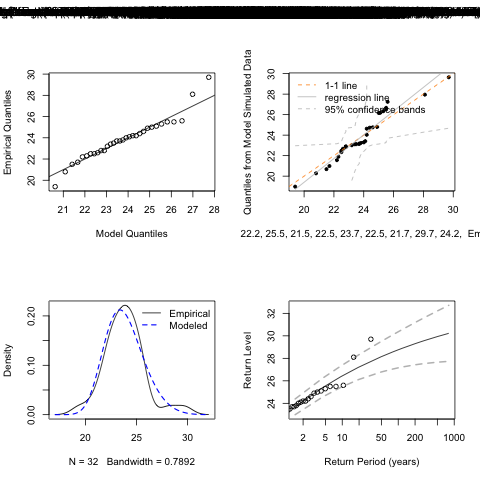

Tipo de Ajuste:  GEV
Método del Ajuste:  Bayesian
         location log.scale         shape new
    [1,] 23.06394 0.5640012 -0.1628816368   0
    [2,] 23.29770 0.5640012 -0.1628816368   1
    [3,] 23.27768 0.5696776 -0.2283441364   3
    [4,] 23.22454 0.5029564 -0.1549580874   2
    [5,] 23.12634 0.5607213 -0.1434951100   3
    [6,] 23.21428 0.5025826 -0.1858128567   3
    [7,] 23.13304 0.4764981 -0.0463744442   3
    [8,] 23.04952 0.4764981 -0.0463744442   1
    [9,] 23.04952 0.4764981 -0.0463744442   0
   [10,] 22.85024 0.5522314 -0.0670262359   3
   [11,] 22.78250 0.5495687 -0.0073933229   2
   [12,] 22.78250 0.5495687 -0.0073933229   0
   [13,] 22.82030 0.5495687  0.0194413245   2
   [14,] 22.82030 0.5495687  0.0194413245   0
   [15,] 22.79760 0.6415186  0.0182682272   3
   [16,] 22.73757 0.6585723  0.0083780861   3
   [17,] 22.81066 0.6392593 -0.0489819980   3
   [18,] 22.83781 0.6275736 -0.1103175659   3
   [19,] 22.85318 0.7287007 -0.1042880827   3
   [20,] 22.74847 0.7287007 -0

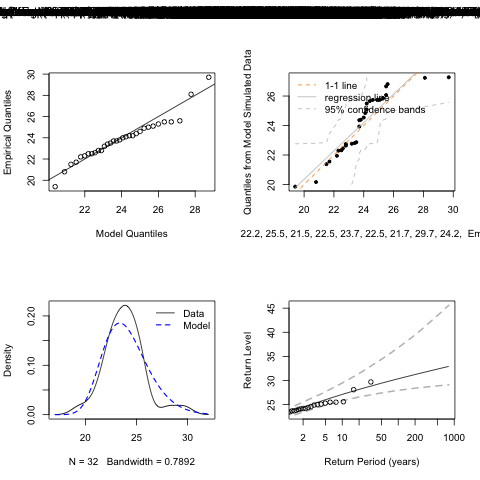

Tipo de Ajuste:  GEV
Método del Ajuste:  Lmoments
  location      scale      shape 
23.0639415  1.7576913 -0.1628816 



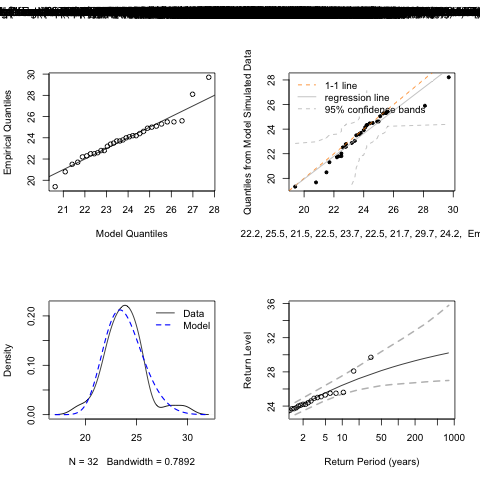

Tipo de Ajuste:  Gumbel
Método del Ajuste:  MLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





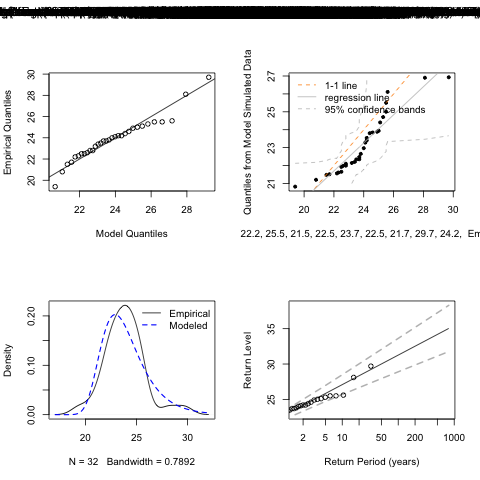

Tipo de Ajuste:  Gumbel
Método del Ajuste:  GMLE
$par
 location     scale 
22.905876  1.814452 

$value
[1] 67.38487

$counts
function gradient 
      14        5 

$convergence
[1] 0

$message
NULL

$hessian
          location     scale
location  9.719762 -4.762621
scale    -4.762621 21.535378

$num.pars
$num.pars$location
[1] 1

$num.pars$scale
[1] 1

$num.pars$shape
NULL





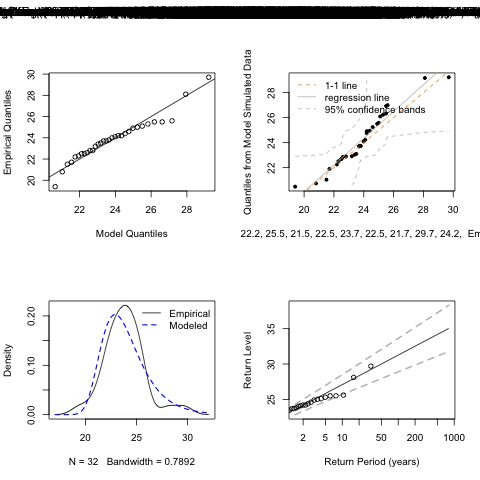

Tipo de Ajuste:  Gumbel
Método del Ajuste:  Bayesian


/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  número de items para para sustituir no es un múltiplo de la longitud del reemplazo

  warnings.warn(x, RRuntimeWarning)
/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Además: 
  warnings.warn(x, RRuntimeWarning)
/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: In (function (x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,  :
  warnings.warn(x, RRuntimeWarning)
/Users/JuanGabriel/anaconda

RRuntimeError: Error in res[1, (nloc + nsc + 1):np] <- initial$shape : 
  número de items para para sustituir no es un múltiplo de la longitud del reemplazo


In [91]:
for t in tipos:
    for m in metodos:
        print("Tipo de Ajuste: ", t)
        print("Método del Ajuste: ", m)
        result = fevd(max_ws.values, method = m, type = t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)